# Classification

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as option). 

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt 

## 1. Data

Make a classification dataset

In [2]:
!pip install scikit-learn

In [3]:
from sklearn.datasets import make_circles

In [4]:
#Make 1000 samples 
n_samples = 1000

#Create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
print(f'First 5 samples of X: \n {X[:5]}')
print('\n')
print(f'First 5 samples of y: \n {y[:5]}')

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


First 5 samples of y: 
 [1 1 1 1 0]


In [7]:
#Features are two!
X[0] 

array([0.75424625, 0.23148074])

In [8]:
y[0]

1

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
#labels are binary (0 or 1). 
#So it will be binary classification.

In [11]:
#Make DataFrames of circle data.
import pandas as pd 
circles = pd.DataFrame({'X1': X[:,0], 
                        'X2': X[:,1],
                        'label': y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


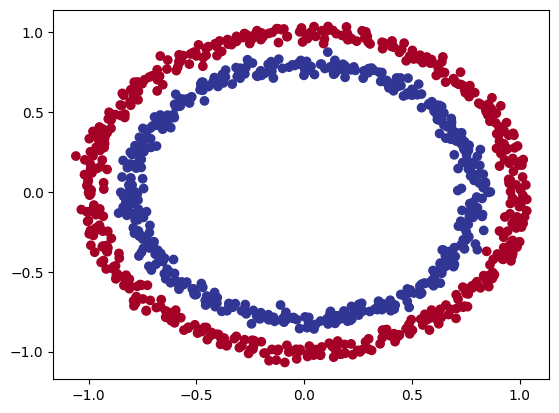

In [12]:
#Visualize 
plt.scatter(x=X[:,0],
            y=X[:,1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to pratice the fundamentals. 

###  1.1 Check input and output Shapes

In [13]:
X.shape, y.shape

((1000, 2), (1000,))

In [14]:
type(X)

numpy.ndarray

In [15]:
#View the first example of the features and labels 

In [16]:
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits.

In [17]:
type(X)

numpy.ndarray

In [18]:
X.dtype

dtype('float64')

* We need to convert numpy ndarray to tensor.

* we also want to convert from float64 to float32.

* Because float32 is default in Pytorch.

In [19]:
#Turn data into Tensors
X = torch.from_numpy(X).type(torch.float) #float is an alias to float32 (equivalent)
y = torch.from_numpy(y).type(torch.float)

In [20]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [21]:
type(y), y.dtype

(torch.Tensor, torch.float32)

### 1.3 Splitting the Train, Test set 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, #0.2 = 20% of data will be test & 80% will be train
                                                    shuffle=True, 
                                                    random_state=42)

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a Model 

Build a model to classify our blue and red dots. 

To do so we want: 

1. Setup device agnostic code so our code will run on an accelerator(GPU). 
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and optimizer. 
4. Create a training and test loop.

In [25]:
# Make device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'Code will be running on Device: {device}')

Code will be running on Device: cuda


let's create a model: 

1. Subclassing 'nn.Module' (almost all the models in Pytorch subclass 'nn.Module'). 
2. Create 2 'nn.Linear()' layers that are capable of handling the shapes of our data. 
3. Defines a 'forward()' method that outlines the forward pass or forward computation. 
4. Instantiate an instance of our model. 

In [26]:
#Look at the shape of input 
X_train.shape

torch.Size([800, 2])

There are 800 rows and 2 columns. 

That means there are 2 features and 800 training samples.  

In [27]:
#1. Construct a model that subclasses nn.Module. 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn.linear layers capable of handling the shapes of our data.
        self.layer_1 = nn.Linear(in_features=2, #takes in 2 features, and upscales to 5 features.
                                out_features=8) #Hidden units 
        self.layer_2 = nn.Linear(in_features=8, #takes that 8 features from previous layer and ouputs 1 (outcome) (1 or 0)
                                out_features=1)
    #3. Define a forward computation
    def forward(self,x):
        x1 = self.layer_1(x)
        y = self.layer_2(x1)
        return y

In [28]:
#Instantiate the model class 
model_v0 = CircleModelV0().to(device)

In [29]:
model_v0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [30]:
model_v0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2091, -0.0448],
                      [-0.1904,  0.6170],
                      [-0.3661,  0.0145],
                      [-0.6968,  0.6244],
                      [ 0.2685,  0.6549],
                      [-0.2463, -0.2843],
                      [-0.4089,  0.1846],
                      [ 0.3258,  0.1944]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0450, -0.2241, -0.0651, -0.5540,  0.4049, -0.4165, -0.5502, -0.4750],
                     device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0299, -0.2441, -0.0889,  0.1973,  0.0450,  0.1128,  0.1413,  0.1466]],
                     device='cuda:0')),
             ('layer_2.bias', tensor([0.3367], device='cuda:0'))])

In [31]:
next(model_v0.parameters()).device

device(type='cuda', index=0)

## 2.2 Build a Model (Sequential)

Let's replicate the model above using nn.Sequential() 

In [32]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8), 
    nn.Linear(in_features=8, out_features= 1)
).to(device)

In [33]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [34]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6788,  0.6626],
                      [ 0.0495, -0.0232],
                      [ 0.0875,  0.1732],
                      [ 0.2904, -0.2602],
                      [ 0.3583, -0.2629],
                      [-0.5538, -0.5808],
                      [-0.4572, -0.6844],
                      [-0.4066, -0.5960]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0494,  0.1056, -0.3538,  0.2328, -0.4252,  0.3181, -0.2793, -0.2409],
                     device='cuda:0')),
             ('1.weight',
              tensor([[-0.0874,  0.2727, -0.1586,  0.1889,  0.1708, -0.1434,  0.1970, -0.2736]],
                     device='cuda:0')),
             ('1.bias', tensor([-0.3012], device='cuda:0'))])

In [35]:
#checking whether it is on GPU or not 
next(model_0.parameters()).device

device(type='cuda', index=0)

In [36]:
#make predictions 
with torch.inference_mode():
    random_preds = model_0(X_test.to(device))

print(f'Length of predictions: {len(random_preds)}, Shape: {random_preds.shape}\n')

print(f'Length of test samples : {len(y_test)}, Shape: {y_test.shape}')

print(f'\nFirst 10 Predictions: \n{random_preds[:10]}')

print(f'\nFirst 10 test labels: \n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])

Length of test samples : 200, Shape: torch.Size([200])

First 10 Predictions: 
tensor([[-0.4294],
        [-0.3424],
        [-0.4457],
        [-0.4257],
        [-0.1092],
        [-0.0586],
        [-0.0802],
        [-0.0129],
        [-0.4599],
        [-0.3328]], device='cuda:0')

First 10 test labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.3 Setup Loss function and Optimizer 

**Task**: Binary Classification. 

**Loss function:** Binary Cross Entropy.

**Optimizer:** SGD or ADAM. 

In [37]:
# BCE Loss
#loss_fn = nn.BCELoss() # BCELoss - requires inputs to have gone through the sigmoid activation function prior to input to BCELoss.

In [38]:
# setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss - Sigmoid activation function built-in. 

# Optimizer 
optimizer = torch.optim.Adam(params=model_v0.parameters(), 
                            lr=0.01)

In [39]:
#Calculate Accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

**torch.eq** - Computes element-wise equality.

## 3. Train a Model

To Train our model, we're going to build a training loop. 

1. Forward Pass
2. Calculate the loss
3. Optimizer Zero grad.
4. Loss backward (backpropagation).
5. Optimizer Step (Gradient descent).

#### 3.1 Going from raw logits -> prediction probabilites -> predictions labels.

Our model outputs are going to be raw **logits**. 

We can convert these logits into prediction probabilities by passing them to some kind of activate function (e.g. Sigmoid for binary classification and Softmax for multi classification. cross-entropy). 

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking **argmax** among all of them.

* rounding is for binary classification. 
* argmax is for multi-classification.

In [40]:
#View the first 5 outputs of the forward pass on the test data. 
with torch.inference_mode():
    y_logits = model_v0(X_test.to(device))[:5]

y_logits

tensor([[0.1594],
        [0.1302],
        [0.1671],
        [0.1575],
        [0.0577]], device='cuda:0')

y_logits are raw output from the neural network. 

To get output probabilities, we need to pass these raw logits through the Sigmoid layer.

In [41]:
#these are actual ground truth
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [42]:
#use the Sigmoid activation function on our model logits to turn them into predictions probabilities.
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5398],
        [0.5325],
        [0.5417],
        [0.5393],
        [0.5144]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them: 
 * `y_pred_probs` >= 0.5, `y=1` (class-1)
 * `y_pred_probs` <= 0.5, `y=0` (class-0) 


In [43]:
#then we need to round these values
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

logits (raw output from neural networks) -> predictions probabilities ->  prediction labels.

1. We apply `Sigmoid activation function` on `logits` to obtain `prediction probabilities`.
2. We apply `rounding` on top of `prediction probabilities` to obtain `prediction labels`. 

* If we use nn.BCELoss() -> it expects prediction probabilities as Input. 
* If we use nn.BCEWithLogitsLoss() -> it expects raw logits as Input. 

### 3.2 Building Training Loop and Test loop.

In [44]:
#passing the data onto GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [45]:
# setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss - Sigmoid activation function built-in. 

# Optimizer 
optimizer = torch.optim.Adam(params=model_v0.parameters(), 
                            lr=0.01)

In [46]:
#to preserve reproducability 
torch.manual_seed(42)

#for gpu 
torch.cuda.manual_seed(42)

epochs = 500

for epoch in range(epochs):
    
    #training mode
    model_v0.train()
    
    #1. forward pass on train set
    y_logits = model_v0(X_train).squeeze()
    y_pred_probs = torch.sigmoid(y_logits) #turn logits -> pred probs
    y_preds = torch.round(y_pred_probs) #turn pred probs -> pred labels

    #2. Calculate the loss
    loss = loss_fn(y_logits, y_train) 
    #Our loss is BCEWithLogitsLoss(), it expects raw logits as input

    #Accuracy 
    acc = accuracy_fn(y_true=y_train, y_pred=y_preds) 

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backwards (backPropagation)
    loss.backward()

    #5. optimizer step (gradient descent)
    optimizer.step()

    #test loop
    model_v0.eval()

    #inference mode
    with torch.inference_mode():
        #forward pass
        test_logits = model_v0(X_test).squeeze()
    
        test_preds = torch.round(torch.sigmoid(test_logits)) 
        
        #calculate the loss
        test_loss = loss_fn(test_logits, y_test)
    
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    #printing out info
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%')

Epoch: 0 | Loss: 0.69521 | Acc: 50.00% | Test Loss: 0.69405 | Test Acc: 55.00%
Epoch: 10 | Loss: 0.69317 | Acc: 51.38% | Test Loss: 0.69554 | Test Acc: 47.00%
Epoch: 20 | Loss: 0.69301 | Acc: 49.88% | Test Loss: 0.69454 | Test Acc: 45.00%
Epoch: 30 | Loss: 0.69301 | Acc: 51.00% | Test Loss: 0.69459 | Test Acc: 46.50%
Epoch: 40 | Loss: 0.69299 | Acc: 51.50% | Test Loss: 0.69485 | Test Acc: 45.00%
Epoch: 50 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69456 | Test Acc: 46.50%
Epoch: 60 | Loss: 0.69298 | Acc: 51.38% | Test Loss: 0.69468 | Test Acc: 45.50%
Epoch: 70 | Loss: 0.69298 | Acc: 50.75% | Test Loss: 0.69473 | Test Acc: 45.50%
Epoch: 80 | Loss: 0.69298 | Acc: 51.50% | Test Loss: 0.69466 | Test Acc: 46.00%
Epoch: 90 | Loss: 0.69298 | Acc: 51.25% | Test Loss: 0.69469 | Test Acc: 46.00%
Epoch: 100 | Loss: 0.69298 | Acc: 51.25% | Test Loss: 0.69467 | Test Acc: 45.00%
Epoch: 110 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 120 | Loss: 0.69298 | Acc: 51.12

### 4. Make predictions and Evaluate the model

From metrics it looks like our model isn't learning anything....

So to inspect it let's make some predictions and make them visualize!

In other words, Visualize, Visualize,.....

To do so, we're going to import a function called `plot_decision_boundary()`

In [47]:
import requests 
from pathlib import Path

#raw version of file from github
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

# Download helper functions from learn PyTorch repo (if it's not already downloaded). 
if Path("helper_functions.py").is_file():
    print("helper_function.py is already existed!, Skipping downlaoading!!!")
else: 
    print('Downloading helper_functions.py file!!')
    request = requests.get(url)
    with open("helper_function.py",'wb') as f:
        f.write(request.content)

In [48]:
from helper_function import plot_decision_boundary, plot_predictions

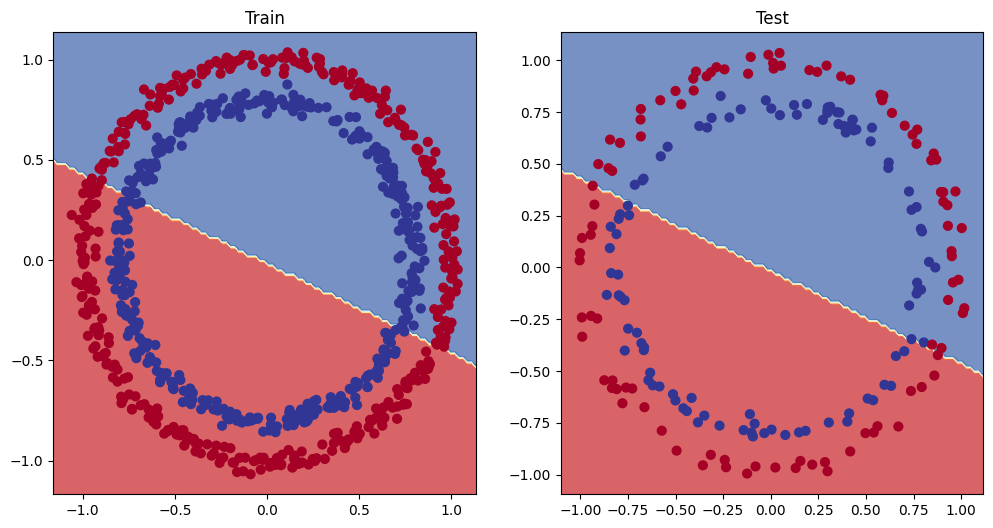

In [49]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))

#first plot
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_v0, X_train, y_train)

#second plot 
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_v0, X_test, y_test)

## 5. Improving a Model (from a model perspective)

some options: 

    1. Add more layers - give the model more chances to learn about patterns in the Data. 
    2. Add more Hidden units - go from 5 hidden units to 10 hidden units. 
    3. Increasing more Epochs - Train it for more epochs. (Fit for longer). 
    4. Changing the activation functions (we can put activation functions between layers).
    5. Change the learning rate. 
    6. Change the loss function. 

These options are all from the model's perspectives because they deal directly with the model, rather than the data.  

And because these options are all values we (as machine learning engineer and data scientists) can change, they are referred as **hyperparameters** 

Let's try and improve our model by:  
  * adding more hidden units: 5 -> 10.
  * Increase number of layers: 2 -> 3.
  * Increase the number of epochs: 100 -> 1000. 

In [50]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1) 
    
    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverages speed ups where possible behind the scenes. 

model_v1 = CircleModelV1().to(device)

In [51]:
model_v1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
model_v1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265],
                     device='cuda:0')),
             ('la

In [53]:
#create a loss function, optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_v1.parameters(),
                            lr=0.01)

In [54]:
#Training loop & evaluation loop for model_v1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 1000

#Put data on target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#loop over data
for epoch in range(epochs):
    
    #train mode
    model_v1.train()
    
    #1. forward pass
    y_logits = model_v1(X_train).squeeze() #output from our neural network is raw logits
    y_pred_probs = torch.sigmoid(y_logits) #from raw logits to y_pred_probs (0-1) (probability)
    y_preds = torch.round(y_pred_probs) #from pred probs to pred_labels

    #2. calculate the loss
    loss = loss_fn(y_logits, y_train)

    #accuracy
    acc = accuracy_fn(y_train, y_preds)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backwards
    loss.backward()

    #5. optmizer step 
    optimizer.step()

    #evaluation 
    model_v1.eval()

    with torch.inference_mode():
        test_logits = model_v1(X_test).squeeze()
        test_pred_probs = torch.sigmoid(test_logits)
        test_preds = torch.round(test_pred_probs)

        #loss
        test_loss = loss_fn(test_logits, y_test)

        #accuracy 
        test_acc = accuracy_fn(y_test, test_preds)

        #printing out info 
        if epoch % 100 == 0:
            print(f'Epoch: {epoch} | Acc: {acc} - Loss: {loss} | Test Acc: {test_acc} - Test Loss: {test_loss} ')

Epoch: 0 | Acc: 50.24999999999999 - Loss: 0.6967406868934631 | Test Acc: 47.0 - Test Loss: 0.6996342539787292 
Epoch: 100 | Acc: 51.24999999999999 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946991682052612 
Epoch: 200 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946794986724854 
Epoch: 300 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946795582771301 
Epoch: 400 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946795582771301 
Epoch: 500 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946795582771301 
Epoch: 600 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946795582771301 
Epoch: 700 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946795582771301 
Epoch: 800 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Loss: 0.6946795582771301 
Epoch: 900 | Acc: 51.0 - Loss: 0.6929798722267151 | Test Acc: 46.0 - Test Lo

## One way to troubleshoot to a large problem is to test out a smaller problems.

## Model: Linear Regression 



Create a model to predict regression values. 

**Linear Regression** ->  y = weights * X + bias

In [55]:
#known parameters 
weight = 0.89 

bias = 0.35

step = 0.01

X_regression = torch.arange(start=0, end=1, step = step)

y_regression = weight * X_regression + bias

X_regression[:5], y_regression[:5]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400]),
 tensor([0.3500, 0.3589, 0.3678, 0.3767, 0.3856]))

In [56]:
len(X_regression), len(y_regression)

(100, 100)

In [57]:
#splitting the data
train_split = int(0.8 * len(X_regression))

print(f'training set size will be: {train_split}')
print(f'test set size will be: {len(X_regression)-train_split}')

X_train, y_train = X_regression[:train_split], y_regression[:train_split]
X_test, y_test = X_regression[train_split:], y_regression[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

training set size will be: 80
test set size will be: 20


(80, 80, 20, 20)

In [58]:
X_train.shape

torch.Size([80])

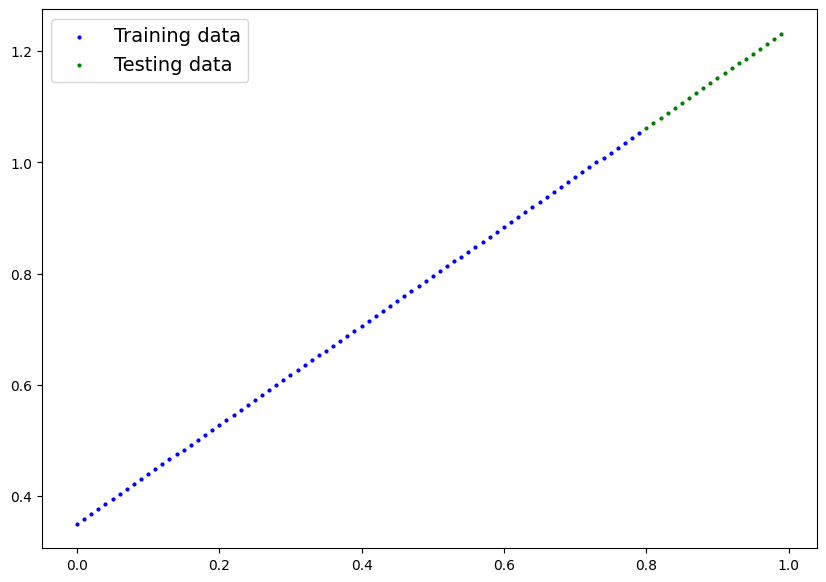

In [59]:
#visualizing the data
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

### 1.2 Adjusting model_v1 to fit a straight line 

In [61]:
X_train[:5], y_train[:5]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400]),
 tensor([0.3500, 0.3589, 0.3678, 0.3767, 0.3856]))

One input feature for one output feature.

In [62]:
#Sequential model 
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=10), 
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [63]:
next(model.parameters()).device

device(type='cuda', index=0)

In [64]:
#loss and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                           lr=0.01)

In [65]:
#Train the model 
#setting random seed 
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

#putting data on target device
X_train, y_train = X_train.to(device).unsqueeze(1), y_train.to(device).unsqueeze(1)
X_test, y_test = X_test.to(device).unsqueeze(1), y_test.to(device).unsqueeze(1)

epochs = 1000

#loop over data 
for epoch in range(epochs):
    #setting model to train mode
    model.train()

    #1. forward pass
    y_preds = model(X_train)

    #2. calculate the loss 
    loss = loss_fn(y_preds, y_train)

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward (backpropagation)
    loss.backward()

    #5. optimizer step (gradient descent)
    optimizer.step()

    #eval loop
    model.eval()

    #forward pass on test data
    test_preds = model(X_test)

    #calculate test loss
    test_loss = loss_fn(test_preds, y_test)

    #printing out what's happening!
    if epoch % 100 == 0: 
        print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}')

Epoch: 0 | Loss: 0.88491 | Test Loss: 1.13108
Epoch: 100 | Loss: 0.02072 | Test Loss: 0.01189
Epoch: 200 | Loss: 0.02605 | Test Loss: 0.00333
Epoch: 300 | Loss: 0.02274 | Test Loss: 0.00414
Epoch: 400 | Loss: 0.02285 | Test Loss: 0.00465
Epoch: 500 | Loss: 0.02198 | Test Loss: 0.00366
Epoch: 600 | Loss: 0.02191 | Test Loss: 0.00445
Epoch: 700 | Loss: 0.02057 | Test Loss: 0.00366
Epoch: 800 | Loss: 0.02041 | Test Loss: 0.00314
Epoch: 900 | Loss: 0.02064 | Test Loss: 0.00412


In [66]:
#gathering all the predictions 
with torch.inference_mode():
    predictions = model(X_test)

In [67]:
for p,a in zip(y_test[:5],  predictions[:5]):
    print(f'Actual y_test : {a} | Prediction: {p}')

Actual y_test : tensor([1.0216], device='cuda:0') | Prediction: tensor([1.0620], device='cuda:0')
Actual y_test : tensor([1.0300], device='cuda:0') | Prediction: tensor([1.0709], device='cuda:0')
Actual y_test : tensor([1.0384], device='cuda:0') | Prediction: tensor([1.0798], device='cuda:0')
Actual y_test : tensor([1.0468], device='cuda:0') | Prediction: tensor([1.0887], device='cuda:0')
Actual y_test : tensor([1.0552], device='cuda:0') | Prediction: tensor([1.0976], device='cuda:0')


In [68]:
#need to detach predictions (transfer them to cpu)
predictions = predictions.cpu().numpy()

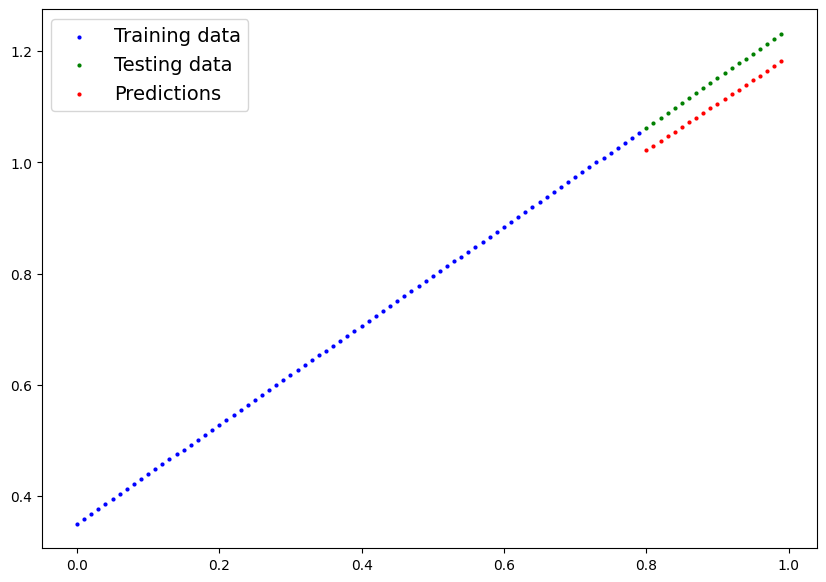

In [69]:
plot_predictions(train_data=X_train.cpu(), train_labels=y_train.cpu(), test_data=X_test.cpu(), test_labels=y_test.cpu() ,predictions=predictions)

# 6. The missing piece: Non-Linearity 

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

In machine learning terms, an infinite (but really it is finite) of linear and non-linear functions.

### 6.1 Recreating non-linear data (red & blue circles)

In [70]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

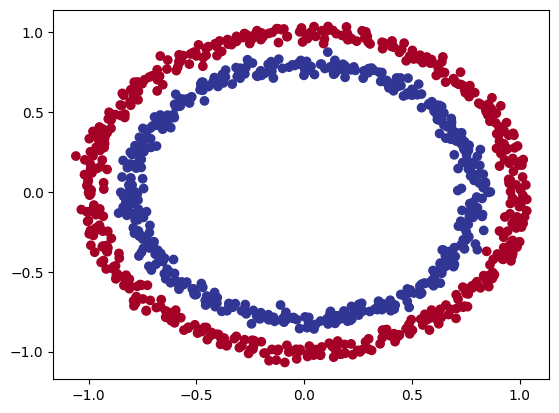

In [71]:
n_samples = 1000 

X,y = make_circles(n_samples = n_samples, 
                  noise=0.03,
                  random_state=42)

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

plt.show()

In [72]:
#convert data into tensors
import torch
from sklearn.model_selection import train_test_split


#turn data into tensors.
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,shuffle=True,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with a non-linearity 

* **Linear** - Straight lines.
* **Non-Linear** - Non Straight lines.

In [73]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cuda'

In [74]:
print(f'Input features shape: {X_train.shape}')

print(f'Ouput shape: {y_train.shape}')

print('Input has 2 Features')
print('Ouput will be 1, because it is binary classification!')

Input features shape: torch.Size([800, 2])
Ouput shape: torch.Size([800])
Input has 2 Features
Ouput will be 1, because it is binary classification!


In [75]:
#build a model with Non-linear functions 
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    #forward pass
    def forward(self,x):
        z = self.layer_1(x)
        z = self.relu(z)
        z = self.layer_2(z)
        return z 

In [76]:
model_v2 = CircleModelV2().to(device)

In [77]:
model_v2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [78]:
next(model_v2.parameters()).device

device(type='cuda', index=0)

In [79]:
X_train[0]

tensor([ 0.6579, -0.4651])

In [80]:
#loss function 
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.Adam(params=model_v2.parameters(),
                            lr=0.01)

In [81]:
#Training loop 
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

#putting data into target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    #train mode 
    model_v2.train()

    #forward pass
    y_logits = model_v2(X_train).squeeze() #logits -> raw outputs from neural network. 

    #prediction probabilities
    y_pred_prob = torch.sigmoid(y_logits)

    #prediction labels
    y_preds = torch.round(y_pred_prob)

    #Accuracy 
    acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

    #loss the calculate 
    loss = loss_fn(y_logits, y_train)

    #optimizer zero grad
    optimizer.zero_grad()
    
    #loss backwards
    loss.backward()

    #optimizer step (gradient descent)
    optimizer.step()

    #evalution 
    model_v2.eval()

    with torch.inference_mode():
        test_logits = model_v2(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

    #loss calculation 
    test_loss = loss_fn(test_preds, y_test)

    #test accuracy
    test_acc = accuracy_fn(y_test, test_preds)

    #printing what's happening!
    if epoch % 100 == 0: 
        print(f'Epoch : {epoch} | Loss: {loss:.4} - Acc: {acc:.3}% | Test Loss: {test_loss:.4} - Acc: {test_acc:.3}%')

Epoch : 0 | Loss: 0.6971 - Acc: 53.0% | Test Loss: 0.7738 - Acc: 55.0%
Epoch : 100 | Loss: 0.5512 - Acc: 84.8% | Test Loss: 0.5961 - Acc: 82.5%
Epoch : 200 | Loss: 0.2972 - Acc: 98.5% | Test Loss: 0.5194 - Acc: 97.0%
Epoch : 300 | Loss: 0.1521 - Acc: 99.6% | Test Loss: 0.5094 - Acc: 99.0%
Epoch : 400 | Loss: 0.09042 - Acc: 99.9% | Test Loss: 0.5063 - Acc: 99.5%
Epoch : 500 | Loss: 0.06077 - Acc: 99.9% | Test Loss: 0.5032 - Acc: 1e+02%
Epoch : 600 | Loss: 0.04449 - Acc: 99.9% | Test Loss: 0.5032 - Acc: 1e+02%
Epoch : 700 | Loss: 0.03444 - Acc: 99.9% | Test Loss: 0.5032 - Acc: 1e+02%
Epoch : 800 | Loss: 0.02779 - Acc: 99.9% | Test Loss: 0.5032 - Acc: 1e+02%
Epoch : 900 | Loss: 0.0231 - Acc: 99.9% | Test Loss: 0.5032 - Acc: 1e+02%


In [82]:
next(model_v2.parameters()).device

device(type='cuda', index=0)

In [83]:
#Predictions
model_v2.eval() 
with torch.inference_mode():
    logits = model_v2(X_test).squeeze()
    preds = torch.round(torch.sigmoid(logits))

preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

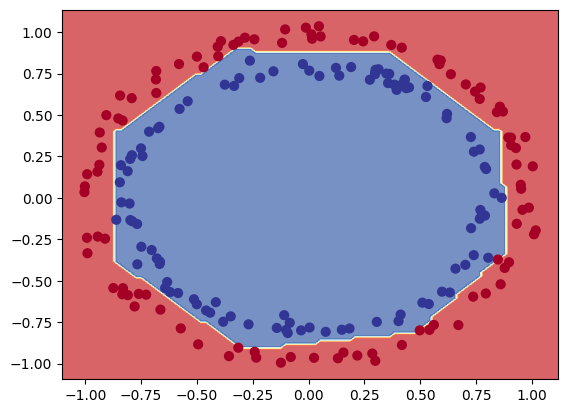

In [84]:
#with lr-0.001
plot_decision_boundary(model_v2, X_test, y_test)

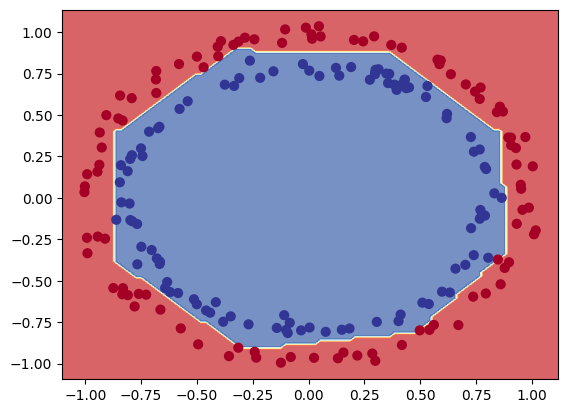

In [85]:
#with lr-0.01
#model with 99% 
plot_decision_boundary(model_v2, X_test, y_test)

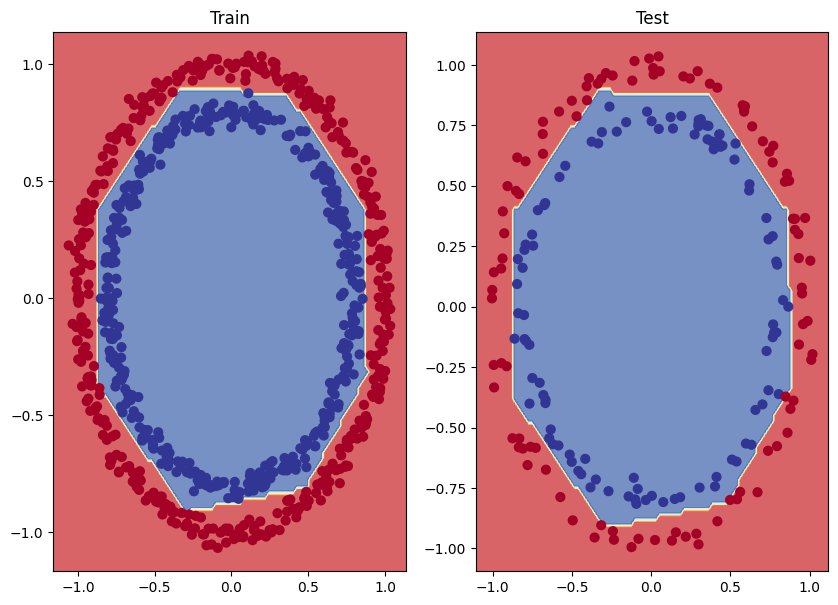

In [86]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_v2, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_v2,X_test, y_test)

## 7. Non Linear Activation Functions

Replicating non-linear activation functions.

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover the patterns in data and it tries to figure out the patterns on its own. 

And these tools are Linear & Non-Linear functions.  

In [87]:
#Create a tensor 
A = torch.arange(-10, 10, 1, dtype=torch.float32)

In [88]:
A.dtype

torch.float32

In [89]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

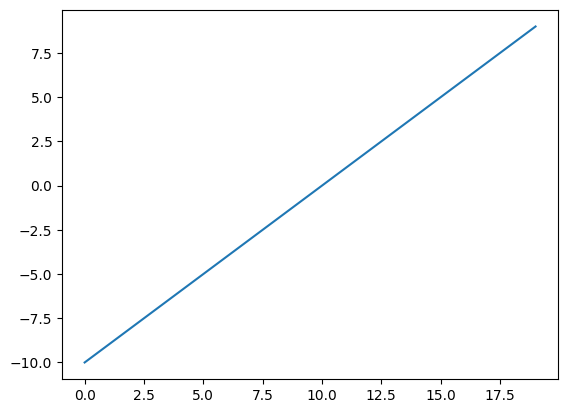

In [90]:
plt.plot(A)

### 7.1 ReLU (Rectified Linear unit)

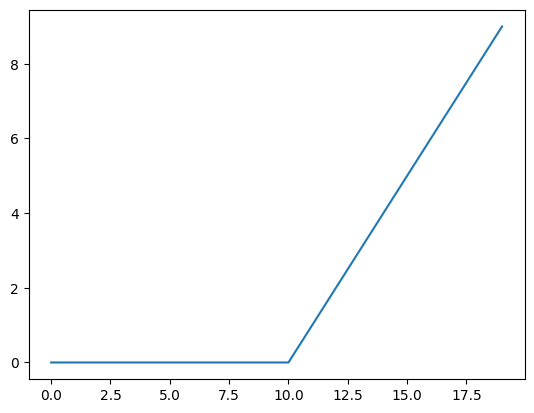

In [91]:
plt.plot(torch.relu(A))

we want to replicate the ReLu activation function

In [92]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) #tensors

In [93]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [94]:
A_relu = relu(A)

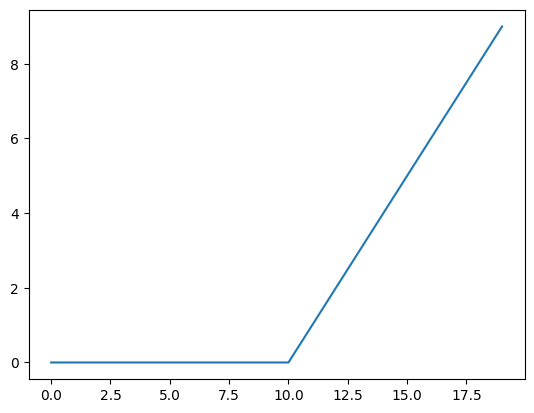

In [95]:
plt.plot(A_relu)

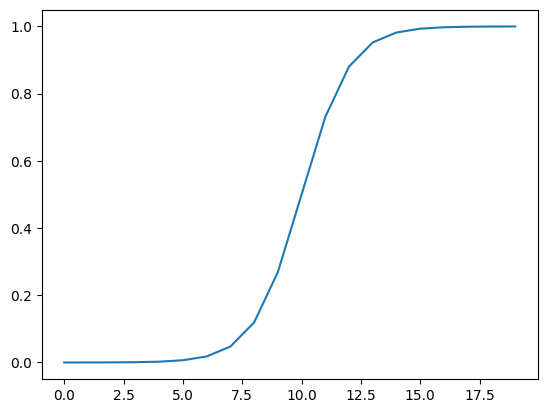

In [96]:
#torch version of Sigmoid
plt.plot(torch.sigmoid(A))

In [97]:
#Sigmoid Activation function. 
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

In [98]:
A_sig = sigmoid(A)

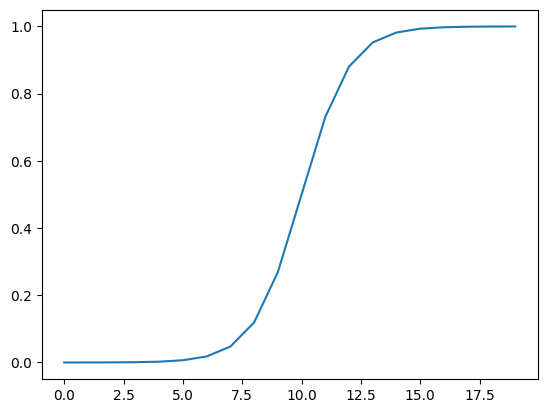

In [99]:
plt.plot(A_sig)

# 8. Multi-class Classification 

* Binary classification: one thing or another (cat vs. dog, spam vs. not spam)
* Multi-class classification: more than one thing or another (cat vs. dg vs. chicken)

In [ ]:
#import libraries
import torch
import matplotlib.pyplot as plt
